In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
from IPython.display import Image
import networkx as nx
import pint

In [4]:
metazoan = pint.load("models/metazoan.an")

Source file is in Automata Network (an) format


In [5]:
metazoan.fixpoints()

# Running command pint-stable --json-stdout --fixpoints -i models/metazoan.an


[{'a': 0, 'c': 0, 'f': 0}, {'a': 1, 'c': 0, 'f': 0}]

In [6]:
metazoan.initial_state

{'a': 0, 'c': 0, 'f': 1}

# Running command pint-sg --json-stdout --state-graph gen/pint7vnurtjd.dot -i models/metazoan.an


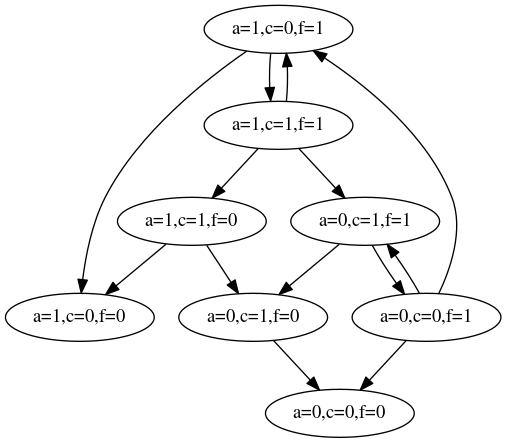

In [20]:
g = metazoan.reachable_stategraph()
Image(nx.nx_pydot.to_pydot(g).create_png())

In [19]:
g.edge

{'0': {},
 '1': {},
 '2': {'0': {0: {}}, '3': {0: {}}, '6': {0: {}}},
 '3': {'1': {0: {}}, '7': {0: {}}},
 '4': {'0': {0: {}, 1: {}}},
 '5': {'1': {0: {}, 1: {}}, '4': {0: {}}},
 '6': {'2': {0: {}}, '4': {0: {}}},
 '7': {'3': {0: {}}, '5': {0: {}}, '6': {0: {}}}}

In [ ]:
metazoan.reachable_attractors()

In [ ]:
metazoan.count_reachable_states()

In [ ]:
help(pint.load)

In [ ]:
metazoan.initial_state.__class__

In [ ]:
a = metazoan.initial_state.having()

In [ ]:
a.__class__

In [ ]:
a == metazoan.initial_state

In [ ]:
a.info == metazoan.initial_state.info